In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import matplotlib.colors

import plotly.graph_objects as go

from PIL import Image
from wordcloud import WordCloud

# Lectura de datos

In [ ]:
df_thesis_all = pd.read_csv("df_thesis_all.csv", sep="|")
print(df_thesis_all.shape)
df_thesis_all.head()

(15320, 16)


,id,thesis_type,right,url,title,author,advisor,keywords,ocde,date,university,abstract,discipline,grade,juror,register_date
0,3161802,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Análisis hidrogeológico conceptual y propuesta...,"Contreras Gutiérrez, Efrain Jhiaromir","Mogrovejo Gutiérrez, Rubén Esaú",Mecánica de suelos; Aguas subterráneas,"('https://purl.org/pe-repo/ocde/ford#2.03.01',)",2022,Universidad Nacional Mayor de San Marcos,Se realizó el estudio de mecánica de suelos y ...,Ingeniería Mecánica de Fluidos,Universidad Nacional Mayor de San Marcos. Facu...,"Serruto Colque, Arístides Ramón; Sarango Julca...",14-Jun-2022; 14-Jun-2022
1,3161807,doctoralThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,La regulación democrática del financiamiento p...,"Manrique Prialé, Roxana Marlene","Chanamé Orbe, Raúl Roosevelt",Jurado Nacional de Elecciones; Financiamiento;...,('https://purl.org/pe-repo/ocde/ford#5.06.01;\...,2022,Universidad Nacional Mayor de San Marcos,Define la relación que existe entre el financi...,Derecho y Ciencia Política,Universidad Nacional Mayor de San Marcos. Facu...,"Paiva Goyburu, Dante Martín; Paucar Chappa, Ma...",15-Jun-2022; 15-Jun-2022
2,3161831,masterThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Sistema de gestión de prevención de riesgos la...,"Godoy Martínez, Manuel Rómulo","Tinoco Gómez, Oscar Rafael",Sistemas de gestión; Seguridad y salud en el t...,"('https://purl.org/pe-repo/ocde/ford#2.11.04',)",2022,Universidad Nacional Mayor de San Marcos,Demostrar que implementar un plan para el sist...,Dirección de Empresas Industriales y de Servicios,Universidad Nacional Mayor de San Marcos. Facu...,"Rivera Poma, Juan Manuel; Inche Mitma, Jorge L...",17-Jun-2022; 17-Jun-2022
3,3161838,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Análisis del uso de tecnologías de información...,"Briones Heras, Mauricio","Pantoja Collantes, Jorge Santiago",Elecciones - Innovaciones tecnológicas - Perú;...,"('https://purl.org/pe-repo/ocde/ford#2.02.04',)",2018,Universidad Nacional Mayor de San Marcos,Describe el uso de las TICs para abordar el pr...,Ingeniería de Sistemas,Universidad Nacional Mayor de San Marcos. Facu...,"Pró Concepción, Luzmila Elisa; Román Concha, N...",16-Jun-2022; 16-Jun-2022
4,3161822,bachelorThesis,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Eficacia de los programas de rehabilitación en...,"Paucar Arellano, Catherine Isabel","Mendoza Correa, María Isabel del Milagro",Actividad motora; Pérdida auditiva; Rehabilita...,('https://purl.org/pe-repo/ocde/ford#3.05.03;\...,2022,Universidad Nacional Mayor de San Marcos,Sistematiza los artículos sobre la eficacia de...,Tecnología Médica en el área de Terapia Física...,Universidad Nacional Mayor de San Marcos. Facu...,"Garay Ugaz, Eduardo Martin; Gómez Gonzales, Wa...",3-Jun-2022; 3-Jun-2022


In [ ]:
df_thesis_all.dtypes

id                int64
thesis_type      object
right            object
url              object
title            object
author           object
advisor          object
keywords         object
ocde             object
date              int64
university       object
abstract         object
discipline       object
grade            object
juror            object
register_date    object
dtype: object

# Procesamiento

## Filtro de datos

In [ ]:
df_thesis_all_pre = df_thesis_all[df_thesis_all["date"] != 2023].copy()
df_thesis_all_pre.shape

(14608, 16)

In [ ]:
thesis_type = {"masterThesis":"Tesis de Maestría",
               "bachelorThesis":"Tesis de Pregrado",
               "doctoralThesis": "Tesis de Doctorado"}

df_thesis_all_pre["thesis_type"] = df_thesis_all_pre["thesis_type"].map(thesis_type)
df_thesis_all_pre[["thesis_type"]].sample(10)

,thesis_type
7957,Tesis de Maestría
790,Tesis de Pregrado
440,Tesis de Pregrado
924,Tesis de Pregrado
5254,Tesis de Pregrado
13896,Tesis de Pregrado
2694,Tesis de Pregrado
12976,Tesis de Pregrado
11713,Tesis de Pregrado
14303,Tesis de Pregrado


In [ ]:
df_thesis_all_pre["discipline"] = df_thesis_all_pre["discipline"].apply(lambda x: x.replace("\r\n", " "))
print(df_thesis_all_pre.shape)
df_thesis_all_pre.head(2)

(14608, 16)


,id,thesis_type,right,url,title,author,advisor,keywords,ocde,date,university,abstract,discipline,grade,juror,register_date
0,3161802,Tesis de Pregrado,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,Análisis hidrogeológico conceptual y propuesta...,"Contreras Gutiérrez, Efrain Jhiaromir","Mogrovejo Gutiérrez, Rubén Esaú",Mecánica de suelos; Aguas subterráneas,"('https://purl.org/pe-repo/ocde/ford#2.03.01',)",2022,Universidad Nacional Mayor de San Marcos,Se realizó el estudio de mecánica de suelos y ...,Ingeniería Mecánica de Fluidos,Universidad Nacional Mayor de San Marcos. Facu...,"Serruto Colque, Arístides Ramón; Sarango Julca...",14-Jun-2022; 14-Jun-2022
1,3161807,Tesis de Doctorado,openAccess,https://renati.sunedu.gob.pe/handle/sunedu/316...,La regulación democrática del financiamiento p...,"Manrique Prialé, Roxana Marlene","Chanamé Orbe, Raúl Roosevelt",Jurado Nacional de Elecciones; Financiamiento;...,('https://purl.org/pe-repo/ocde/ford#5.06.01;\...,2022,Universidad Nacional Mayor de San Marcos,Define la relación que existe entre el financi...,Derecho y Ciencia Política,Universidad Nacional Mayor de San Marcos. Facu...,"Paiva Goyburu, Dante Martín; Paucar Chappa, Ma...",15-Jun-2022; 15-Jun-2022


# EDA

In [ ]:
palette_type = {"Tesis de Pregrado":"#7454EB",
                "Tesis de Maestría":"#5495EB",
                "Tesis de Doctorado":"#34EADF"}

palette_year = {2019:"#58EB38",
                2020:"#7454EB",
                2021:"#5495EB",
                2022:"#34EADF"}

## Cantidad de tesis por tipo

In [ ]:
df_thesis_all_pre["thesis_type"].value_counts()

Tesis de Pregrado     10522
Tesis de Maestría      2945
Tesis de Doctorado     1141
Name: thesis_type, dtype: int64

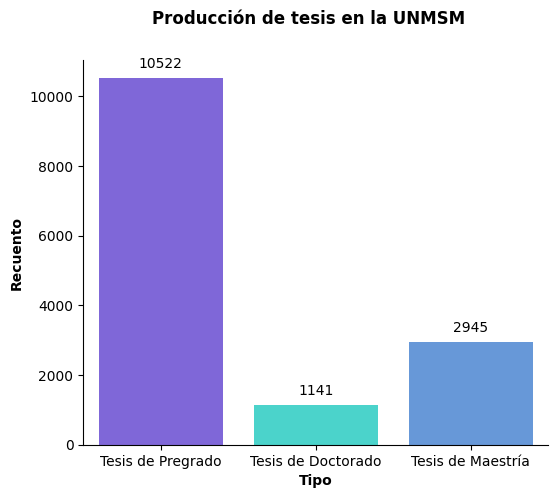

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

sns.countplot(df_thesis_all_pre, x="thesis_type", hue="thesis_type", palette=palette_type, ax=ax)

for container in ax.containers:
    ax.bar_label(container, padding=5)

fig.suptitle("Producción de tesis en la UNMSM", weight="bold")
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel("Tipo", weight="bold")
ax.set_ylabel("Recuento", weight="bold")
plt.show()

## Cantidad de tesis por disciplina

In [ ]:
top_disciplines = df_thesis_all_pre.groupby("discipline").agg({"id":"count"}).reset_index()
top_disciplines = top_disciplines.sort_values(by="id", ascending=False).head(20)
top_disciplines.head()

,discipline,id
504,Ingeniería de Sistemas,605
617,Odontología,568
485,Ingeniería Industrial,563
328,Enfermería,562
378,Farmacia y Bioquímica,547


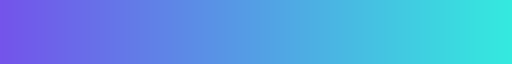

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#7454EB", "#34EADF"])
color_cmap = matplotlib.colormaps.get_cmap(cmap)
color_cmap

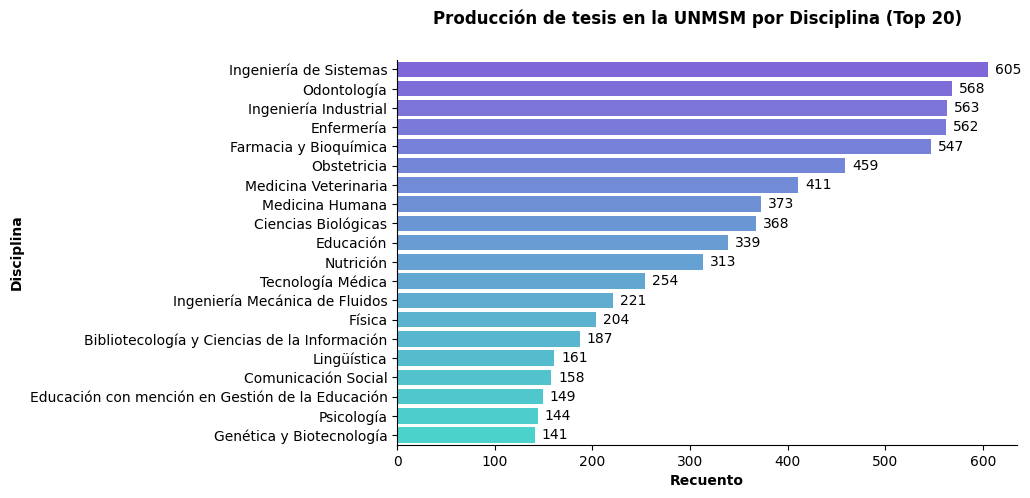

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

colors = [color_cmap(c) for c in np.linspace(0, 1, top_disciplines.shape[0])]
sns.barplot(top_disciplines, y="discipline", x="id", hue="discipline", palette=colors, ax=ax)

for container in ax.containers:
    ax.bar_label(container, padding=5)

fig.suptitle("Producción de tesis en la UNMSM por Disciplina (Top 20)", weight="bold")
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel("Recuento", weight="bold")
ax.set_ylabel("Disciplina", weight="bold")
plt.show()

## Evolución histórica de tesis por año

In [ ]:
prod_thesis_year = df_thesis_all_pre.groupby(["date", "thesis_type"]).agg({"id":"count"}).reset_index()
prod_thesis_year

,date,thesis_type,id
0,2000,Tesis de Maestría,5
1,2000,Tesis de Pregrado,5
2,2001,Tesis de Doctorado,1
3,2001,Tesis de Maestría,1
4,2001,Tesis de Pregrado,9
...,...,...,...
62,2021,Tesis de Maestría,319
63,2021,Tesis de Pregrado,870
64,2022,Tesis de Doctorado,94
65,2022,Tesis de Maestría,350


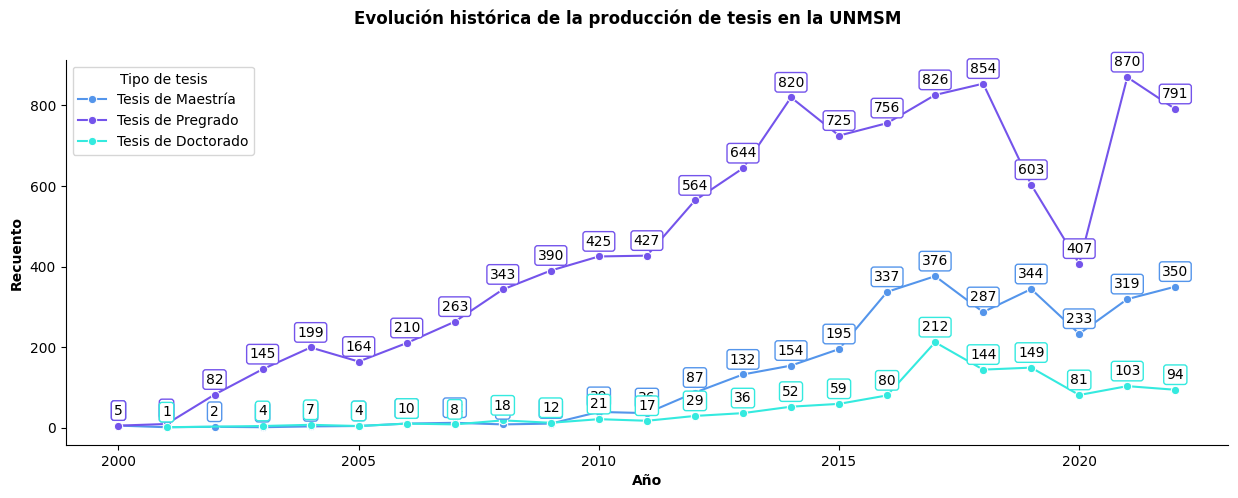

In [ ]:
dict_line = {"_child0":"Tesis de Maestría",
             "_child2":"Tesis de Pregrado",
             "_child4":"Tesis de Doctorado"}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.lineplot(prod_thesis_year, x="date", y="id", hue="thesis_type", palette=palette_type, marker="o", ax=ax)

for line in ax.lines:
    label = line.get_label()
    for point_x, point_y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(point_x, point_y + 20, int(point_y), ha='center', fontsize=10, verticalalignment='bottom', color="black",
                 bbox=dict(facecolor="white", edgecolor=palette_type[dict_line[label]], boxstyle="round", pad=0.2))

fig.suptitle("Evolución histórica de la producción de tesis en la UNMSM", weight="bold")
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel("Año", weight="bold")
ax.set_ylabel("Recuento", weight="bold")
plt.legend(title="Tipo de tesis")

plt.show()

## WordCloud de los keywords de las tesis

### Lista de stopwords

In [ ]:
df_stop = pd.read_csv("https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt", names=["stopword"])
df_stop

,stopword
0,a
1,actualmente
2,adelante
3,además
4,afirmó
...,...
603,éstos
604,última
605,últimas
606,último


In [ ]:
df_thesis_all_pre["keywords"]

0                   Mecánica de suelos; Aguas subterráneas
1        Jurado Nacional de Elecciones; Financiamiento;...
2        Sistemas de gestión; Seguridad y salud en el t...
3        Elecciones - Innovaciones tecnológicas - Perú;...
4        Actividad motora; Pérdida auditiva; Rehabilita...
                               ...                        
15274    Primer civilismo - Perú; Coacción; Insurrecion...
15275    Seguros de salud; Scrum (Desarrollo de softwar...
15276    Dieta saludable; Vegetarianismo; Nivel de cono...
15299    Embarazadas - Complicaciones; Infecciones por ...
15311         Programación lineal; Investigación operativa
Name: keywords, Length: 14608, dtype: object

In [ ]:
list_keywords = []
for index, row in df_thesis_all_pre.iterrows():
    keywords = row["keywords"]
    keywords = keywords.split(";")
    for k in keywords:
        k = k.replace("\xa0", "")
        list_keywords.append(k)

all_words = ' '.join(list_keywords)
len(list_keywords), list_keywords[0:10], all_words[0:100]

(44854,
 ['Mecánica de suelos',
  'Aguas subterráneas',
  'Jurado Nacional de Elecciones',
  'Financiamiento',
  'Elecciones - Legislación - Perú',
  'Sistemas de gestión',
  'Seguridad y salud en el trabajo',
  'Prevención',
  'Riesgos laborales',
  'Elecciones - Innovaciones tecnológicas - Perú'],
 'Mecánica de suelos Aguas subterráneas Jurado Nacional de Elecciones Financiamiento Elecciones - Legi')

### Ploteo del wordcloud

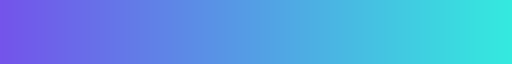

In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#7454EB", "#34EADF"])
color_cmap = matplotlib.colormaps.get_cmap(cmap)
color_cmap

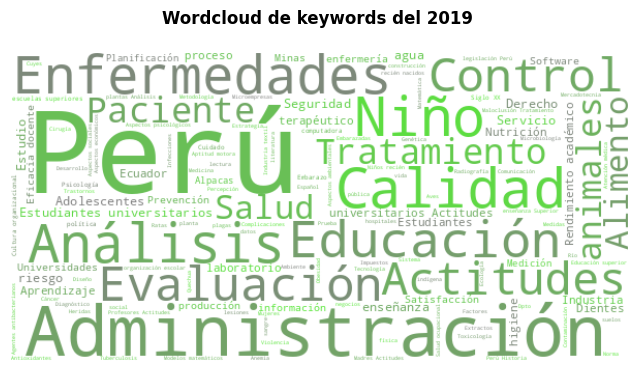

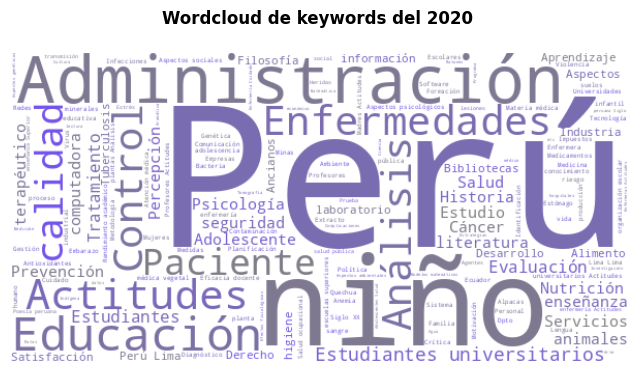

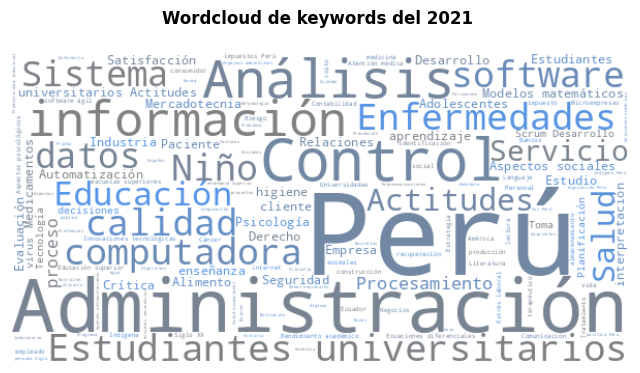

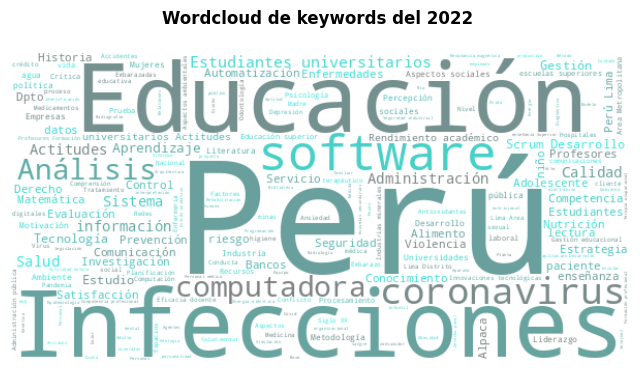

In [ ]:
# image = np.array(Image.open('image.png'))
df_keyword_year = df_thesis_all_pre[df_thesis_all_pre["date"].isin([2019, 2020, 2021, 2022])]

for group, df_temp in df_keyword_year.groupby("date"):

    #all_words = ' '.join(df_temp["title"])
    list_keywords = []
    for index, row in df_temp.iterrows():
        keywords = row["keywords"]
        keywords = keywords.split(";")
        for k in keywords:
            k = k.replace("\xa0", "")
            list_keywords.append(k)

    all_words = ' '.join(list_keywords)

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [palette_year[group], "grey"])

    wordcloud = WordCloud(width=600, height=300, background_color='white', colormap=cmap,
                          stopwords=df_stop["stopword"].values).generate(all_words)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Wordcloud de keywords del {} \n".format(group), weight="bold")
    plt.show()

## Sankeyplot (Flujo de datos)

In [ ]:
df_thesis_all_pre["right"].value_counts()

openAccess         11501
closedAccess        3072
embargoedAccess       35
Name: right, dtype: int64

In [ ]:
#df_sankey = df_thesis_all_pre[df_thesis_all_pre["discipline"].isin(top_disciplines["discipline"].unique())].groupby(["thesis_type", "discipline"]).agg({"id":"count"}).reset_index()
df_sankey = df_thesis_all_pre.groupby(["thesis_type", "right"]).agg({"id":"count"}).reset_index()

df_sankey.columns = ["source_label", "target_label", "value"]
df_sankey

,source_label,target_label,value
0,Tesis de Doctorado,closedAccess,226
1,Tesis de Doctorado,embargoedAccess,4
2,Tesis de Doctorado,openAccess,911
3,Tesis de Maestría,closedAccess,740
4,Tesis de Maestría,embargoedAccess,8
5,Tesis de Maestría,openAccess,2197
6,Tesis de Pregrado,closedAccess,2106
7,Tesis de Pregrado,embargoedAccess,23
8,Tesis de Pregrado,openAccess,8393


In [ ]:
list(pd.unique(df_sankey[['source_label', 'target_label']].values.ravel('K')))

['Tesis de Doctorado',
 'Tesis de Maestría',
 'Tesis de Pregrado',
 'closedAccess',
 'embargoedAccess',
 'openAccess']

In [ ]:
def sankey_plot(data, title):
    ## obtención de elementos únicos ordenados por orden de aparición
    unique_source_target = list(pd.unique(data[['source_label', 'target_label']].values.ravel('K')))
    #print(unique_source_target)

    ## asignación de un índice
    mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
    #print(mapping_dict)

    ## conversión del string label al index label
    data['source'] = data['source_label'].map(mapping_dict)
    data['target'] = data['target_label'].map(mapping_dict)
    #print(data)

    ## conversión del dataframe a diccionario
    links_dict = data[["source", "target", "value"]].to_dict(orient='list')
    #print(links_dict)

    ## creación de la lista de colores para nodos y links
    node_colors = ["#34EADF", "#5495EB", "#7454EB", "silver", "skyblue", "tomato", "gold", "aqua", "darkorange", "mistyrose",
                   "green", "red", "blue",  "yellow", "salmon", "orange", "violet", "fuchsia", "dimgrey", "firebrick",
                   "dodgerblue", "teal", "springgreen", "sienna", "plum", "navy", "hotpink", "cornflowerblue", "powderblue", "purple"] * 3

    link_colors = []
    for l in links_dict["source"]:
        link_colors.append(node_colors[l])

    #print(unique_source_target)
    #print(node_colors)
    #print(links_dict["source"])
    #print(link_colors)

    ## conversión de string colors to RGBA
    link_colors = ["rgba" + str(matplotlib.colors.to_rgba(c, alpha=0.9)) for c in link_colors]
    #print(link_colors)

    ## creación del Sankey plot
    fig = go.Figure(data=[go.Sankey(
        node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = unique_source_target,
        #color = node_colors
        color = "grey"
        ),
        link = dict(
        source = links_dict["source"],
        target = links_dict["target"],
        value = links_dict["value"],
        color = link_colors
    ))])

    fig.update_layout(title_text="Sankey Diagram: " + title,
                      font_size=15, font_color="black",
                      width=800, height=600)

    fig.show()

In [ ]:
sankey_plot(df_sankey, "Sankeyplot")